TensorFlow version: 2.16.1
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233m

c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.8804 - loss: 3.7934 - val_accuracy: 0.9925 - val_loss: 0.0312
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.9627 - loss: 0.2656 - val_accuracy: 0.9887 - val_loss: 0.0298
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9615 - loss: 0.2080 - val_accuracy: 0.9925 - val_loss: 0.0138
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.9707 - loss: 0.1389 - val_accuracy: 0.9937 - val_loss: 0.0351
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9738 - loss: 0.1121 - val_accuracy: 0.9925 - val_loss: 0.0126
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.9727 - loss: 0.1008 - val_accuracy: 0.9875 - val_loss: 0.0329
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.9812 - loss: 0.0663 - val_accuracy: 0.9875 - val_loss: 0.0421
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.9722 - loss: 0

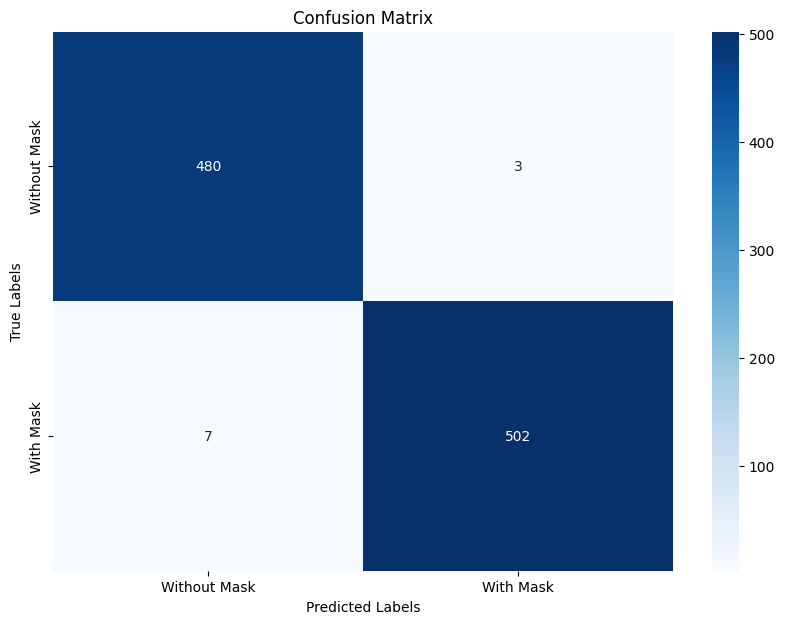

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Check TensorFlow version to ensure compatibility
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Set paths to your data directories
train_dir = 'archive (2)\\Face Mask Dataset\\Train'
validation_dir = 'archive (2)\\Face Mask Dataset\\Validation'
test_dir = 'archive (2)\\Face Mask Dataset\\Test'

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Load MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Extract features using MobileNetV2
def extract_features(generator):
    features = []
    labels = []
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features.append(features_batch)
        labels.append(labels_batch)
        if len(features) * BATCH_SIZE >= generator.samples:
            break
    return np.vstack(features), np.concatenate(labels)

train_features, train_labels = extract_features(train_generator)
validation_features, validation_labels = extract_features(validation_generator)
test_features, test_labels = extract_features(test_generator)

# Flatten extracted features
train_features = train_features.reshape((train_features.shape[0], -1))
validation_features = validation_features.reshape((validation_features.shape[0], -1))
test_features = test_features.reshape((test_features.shape[0], -1))

# Convert labels to categorical
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

# Define the MLP model
mlp_model = models.Sequential()
mlp_model.add(layers.InputLayer(input_shape=(train_features.shape[1],)))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dropout(0.5))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dropout(0.5))
mlp_model.add(layers.Dense(2, activation='softmax'))

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
history = mlp_model.fit(train_features, train_labels, epochs=20, batch_size=BATCH_SIZE, validation_data=(validation_features, validation_labels))

# Evaluate the model
test_loss, test_accuracy = mlp_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Predictions
test_predictions = mlp_model.predict(test_features)
test_predictions_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)

# Print evaluation metrics
print("Classification Report: \n", classification_report(test_true_labels, test_predictions_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(test_true_labels, test_predictions_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()